In [1]:
## Plot maps of differences to a reference run for a certain analysis year
## for an ensemble.

In [2]:
%matplotlib inline

In [3]:
#plt.style.use('classic')
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 12,8
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['font.sans-serif'] = [u"Liberation Sans"] + plt.rcParams['font.sans-serif']
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['axes.xmargin'] =  0.1  # x margin.  See `axes.Axes.margins`
plt.rcParams['axes.ymargin'] =  0.1  # y margin See `axes.Axes.margins`

In [4]:
import os, sys
import glob
from matplotlib import cm
import netCDF4 as nc
import collections
import dimarray as da
import itertools
import numpy as np
# import analyse_timeseries as at; reload(at)
import pandas
# our custom imports
if "../" not in sys.path: sys.path.append("../")
import config as cf; reload(cf)

<module 'config' from '../config.pyc'>

In [5]:
# get the ensemble members
ensemble_members = sorted(glob.glob(os.path.join(
    cf.working_dir,cf.ensemble_name)+"_*"))

In [6]:

def get_variable(ens_member,varname,year,file_pattern="extra_"):

    fname = os.path.join(ens_member,file_pattern+str(year)+".000.nc")
    try:
        ncf = nc.Dataset(fname,"r")
    except IOError as error:
        print fname, "not found."
        raise error
    return np.squeeze(ncf.variables[varname][:])

def plot_difference(ens_member,varname,analysis_year,ref_year, ax=None):
    
    refvar = get_variable(ens_member,varname,ref_year,file_pattern="snapshots_")
    var = get_variable(ens_member,varname,analysis_year)
    ims = ax.imshow(var-refvar,origin="lower",interpolation="none",vmin=-1000,vmax=1000,
                   aspect = 'auto',cmap=cm.seismic)


/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1200/extra_204000.000.nc not found.
/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1202/extra_204000.000.nc not found.
/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1208/extra_204000.000.nc not found.
/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1210/extra_204000.000.nc not found.
/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1216/extra_204000.000.nc not found.
/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1218/extra_204000.000.nc not found.
/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1219/extra_204000.000.nc not found.
/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1224/extra_204000.000.nc not found.
/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1225/extra_204000.000.nc not found.
/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1226/extra_204000.000.nc not found.
/p/tmp/mengel/pism_out/pismpik_036_initmip08km_1227/extra_204000.000.nc not found.


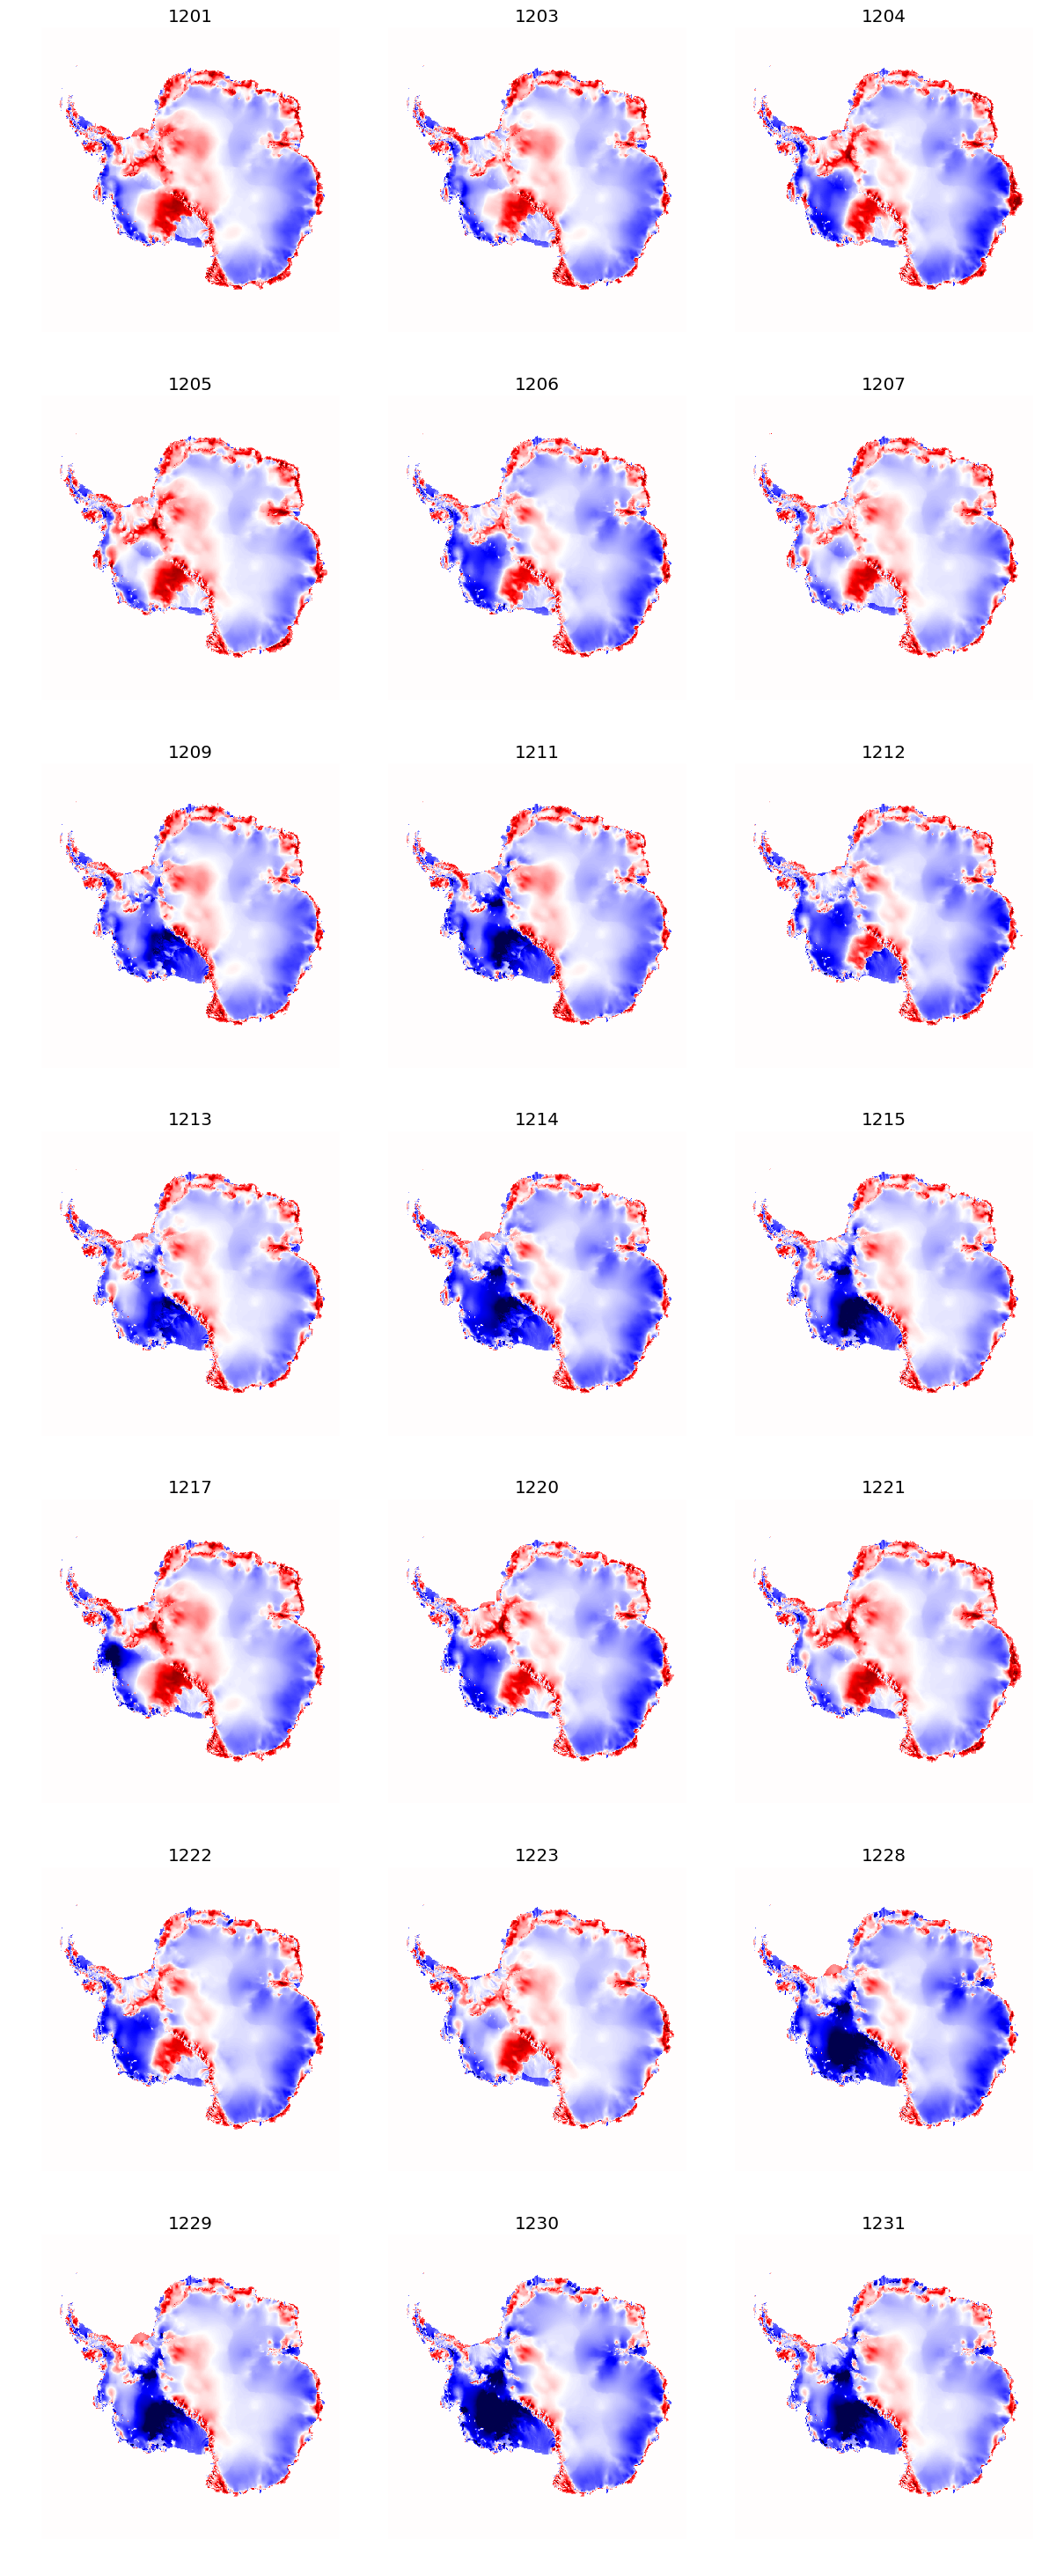

In [7]:
analysis_year = 204000
ref_year = 200000
varname = "thk"

fig = plt.figure(figsize=(12,50))
plt.subplots_adjust(wspace=0,hspace=0)
i = 0
for ens_member in sorted(ensemble_members[0:]):
    
    ax = plt.subplot(12,3,i+1)
    try: 
        plot_difference(ens_member,varname, analysis_year,ref_year, ax=ax)
        ax.axis("off")
        ax.set_title(ens_member.split("_")[-1])
    except IOError:
        continue
        
    i += 1

plt.tight_layout()